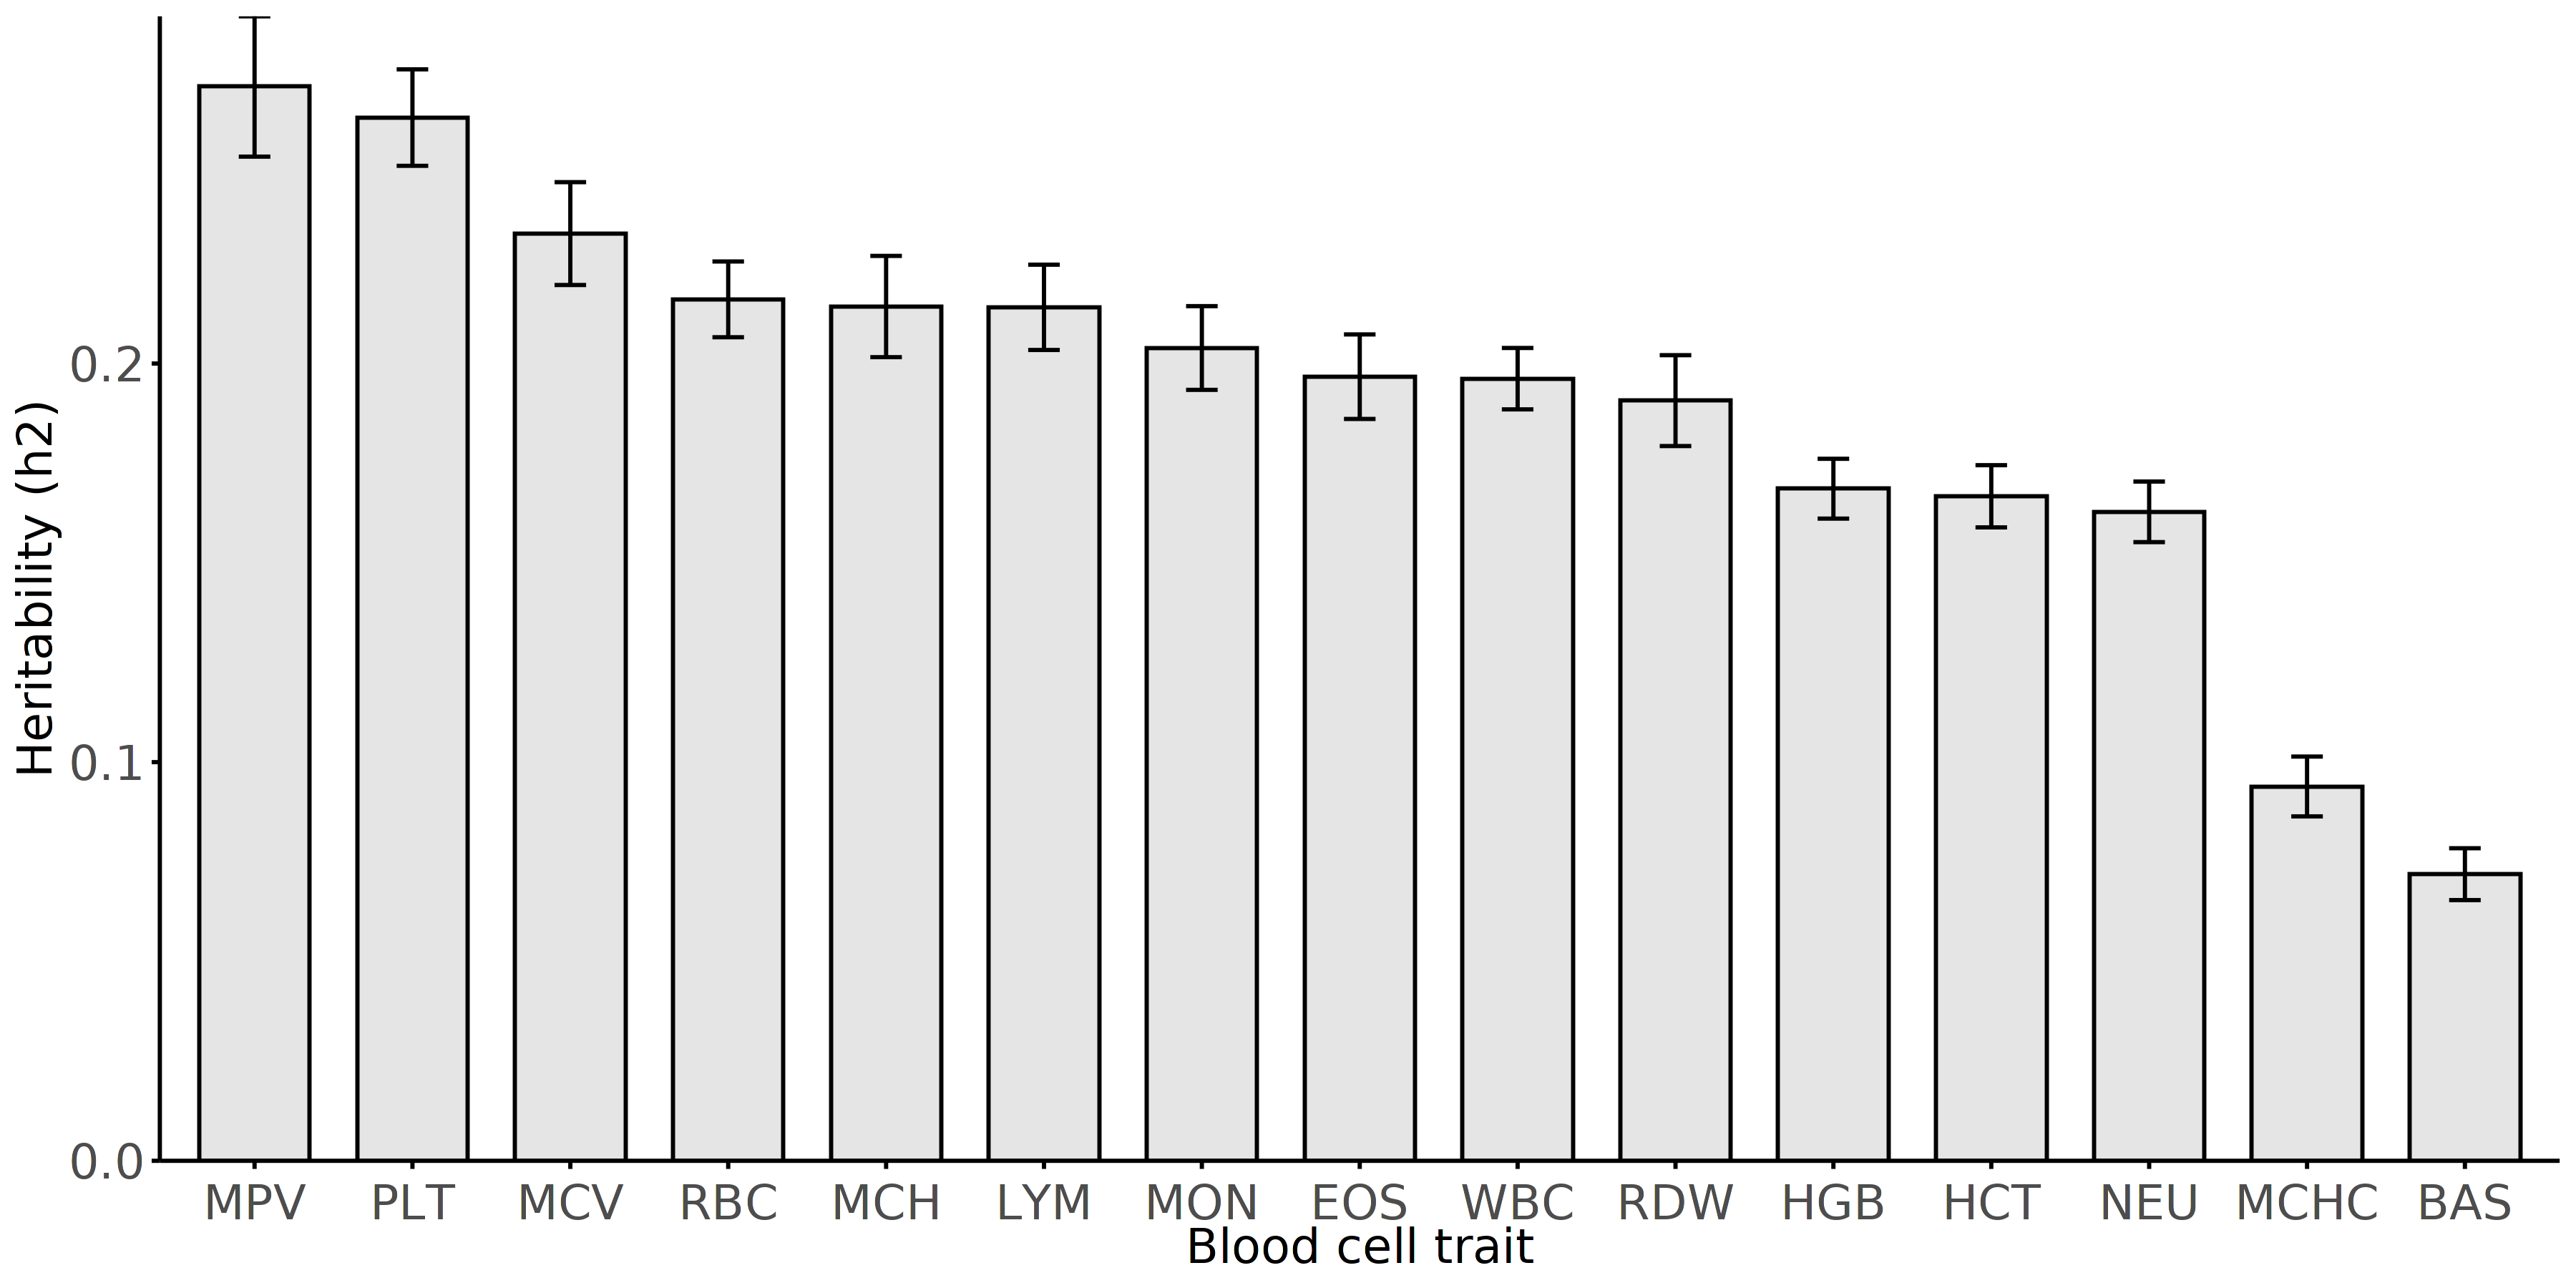

In [14]:
width=12
height=6
options(repr.plot.width = width, repr.plot.height = height, repr.plot.res = 300)
output_folder='~/0_perturb_multiome_manuscript_figures/'
figure_name='blood_cell_trait_heritability_proportion.pdf'

library(ggplot2)
library(dplyr)

setwd("~/ldsc/heritability_estimates")

file_list <- list.files(pattern = "_EA_GWAMA_perturbation_responsive\\.log$")

extract_h2 <- function(file_name) {
  lines <- readLines(file_name)
  target_line <- grep("Total Observed scale h2:", lines, value = TRUE)
  if (length(target_line) > 0) {
    h2_value <- as.numeric(sub(".*h2: ([0-9.]+) \\(.*", "\\1", target_line))
    std_error <- as.numeric(sub(".*\\(([0-9.]+)\\).*", "\\1", target_line))
    category <- sub("BCX2_(.*)_EA_GWAMA.*", "\\1", basename(file_name))
    return(data.frame(Category = category, h2 = h2_value, StdErr = std_error))
  } else {
    return(data.frame(Category = NA, h2 = NA, StdErr = NA))
  }
}

h2_data <- do.call(rbind, lapply(file_list, extract_h2))

h2_data <- na.omit(h2_data)

h2_data$Category <- factor(h2_data$Category, levels = h2_data$Category[order(h2_data$h2, decreasing = TRUE)])

ggplot(h2_data, aes(x = Category, y = h2)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7, color='black',fill='grey90') +
  geom_errorbar(aes(ymin = h2 - StdErr, ymax = h2 + StdErr), width = 0.2) +
  #labs(title = "Heritability by Category", x = "Category", y = "Heritability (h2)") +
  theme_minimal()+
  theme(axis.ticks= element_line(color = "black"),

    text = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text.x = element_text(angle = 0, hjust = 0.5, vjust = 0, size = 16),
    axis.text.y = element_text(size = 16),
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(color = "black"),
    strip.text = element_text(size = 16),
    strip.background = element_blank()
  )+xlab("Blood cell trait") +
ylab("Heritability (h2)")+ scale_y_continuous(expand = c(0, 0))

ggsave(paste(output_folder,figure_name,sep=""),dpi = 600, width = width, height = height)

Values for the text:

In [16]:
h2_data %>%
arrange(h2)

Category,h2,StdErr
<fct>,<dbl>,<dbl>
BAS,0.0719,0.0065
MCHC,0.0939,0.0075
NEU,0.1628,0.0076
HCT,0.1667,0.0078
HGB,0.1686,0.0075
RDW,0.1907,0.0114
WBC,0.1962,0.0077
EOS,0.1967,0.0106
MON,0.2039,0.0105
